# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df_1 = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
#import packages
import requests
import os

In [5]:
#Creating the Request
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
file_name = url.split('/')[-1]
response = requests.get(url)

In [6]:
#Checking if the file name exist
if not os.path.isfile(file_name):
    with open(file_name, 'wb') as f:
        f.write(response.content)

In [7]:
# load the file to dataframe
df_2 = pd.read_csv(file_name, sep='\t')
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [8]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
if not os.path.isfile('tweet_json.txt'):
    with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
end = timer()
print(end - start)
print(fails_dict)

0.0002984369999996517
{}


In [9]:
# list of dictionaries
df3_list = []

with open('tweet_json.txt', 'r') as f:
    for line in f:
        tweet_data = json.loads(line)
        df3_list.append(tweet_data)
        
df3 = pd.DataFrame(df3_list)

In [10]:
# Exploring columns
list(df3)

['created_at',
 'id',
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'extended_entities',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang',
 'retweeted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status']

In [11]:
df3 = df3[['id', 'retweet_count', 'favorite_count']]

In [12]:
df3.sample(5)

,id,retweet_count,favorite_count
1380,700864154249383937,685,2828
655,791780927877898241,4432,0
421,821813639212650496,3839,0
110,871032628920680449,3999,23255
1625,684594889858887680,4016,9843


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [13]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
sum(df_1.duplicated())

0

In [15]:
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
df_1.query('rating_denominator != 10')[['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the flo...,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
784,"RT @dog_rates: After so many requests, this is...",9,11
902,Why does this never happen at my front door......,165,150
1068,"After so many requests, this is Bretagne. She ...",9,11
1120,Say hello to this unbelievably well behaved sq...,204,170
1165,Happy 4/20 from the squad! 13/10 for all https...,4,20
1202,This is Bluebert. He just saw that both #Final...,50,50


In [17]:
df_1.rating_denominator.sort_values()

313       0
2335      2
516       7
1576     10
1575     10
       ... 
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

In [18]:
df_1.rating_numerator.sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
        ... 
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [19]:
df_1.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [20]:
df_1.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [21]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [23]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Quality issues
1. tweet_id column should be string data type not integer for df_1.

2. timestamp and retweeted_status_timestamp should be datetime not object type for df_1.

3. missing values for quite a number of columns for df_1.

4. rating_numerator and rating_denominator have invalid and inconsistent data for df_1.

5. invalid names like (a, an, the and very) in the name column for df_1.

6. column names (p1, p1_ conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog) in the image dataframe are not informative for df_2.

7.  tweet_id column should be string data type not integer for df_2.

8. columns p1, p2 and p3 should be categorical not object for df_2.

9. id column in df3 should be string dtype not integer.





### Tidiness issues
1. for dataframe df_1, (doggo, floofe, pupper, puppo) columns should be categories of a one variable named "dog_stage".

2. df_1 and df3 should be merged to one dataframe at tweet_id.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [24]:
# Make copies of original pieces of data
df_1_clean = df_1.copy()
df_2_clean = df_2.copy()
df3_clean = df3.copy()

### Issue #1: Quality Issues

### `df_1_clean`

#### Errorness datatypes

#### Define:
- convert `tweet_id` dtype to string using `astype`.
- convert `timestamp` and `retweeted_status_timestamp` to datetime using `to_datetime`.

#### Code

In [25]:
# changing tweet_id to string type
df_1_clean.tweet_id =  df_1_clean.tweet_id.astype(object)

In [26]:
# changing timestamp and retweeted_status_timestamp to datetime
df_1_clean.timestamp = pd.to_datetime(df_1_clean.timestamp)
df_1_clean.retweeted_status_timestamp = pd.to_datetime(df_1_clean.retweeted_status_timestamp)

#### Test

In [27]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

####  Missing values related completeness

#### Define:
- Drop missing values for the `expanded_urls` column using `dropna`.
- Fix "None" values in the `doggo`, `floofer`, `pupper`, `puppo` columns.

#### Code

In [28]:
# drop NaN for the expanded_urls column
df_1_clean.expanded_urls.dropna(inplace = True)

In [29]:
df_1_clean.iloc[:, -4:].describe()

,doggo,floofer,pupper,puppo
count,2356,2356,2356,2356
unique,2,2,2,2
top,None,None,None,None
freq,2259,2346,2099,2326


In [30]:
df_1_clean.iloc[:, -4: ] = df_1_clean.iloc[:, -4: ].replace("None", '')

#### Test

In [31]:
df_1_clean.expanded_urls.isnull().all()

False

In [32]:
df_1_clean.iloc[:, -4: ].describe()

,doggo,floofer,pupper,puppo
count,2356,2356,2356,2356
unique,2,2,2,2
top,,,,
freq,2259,2346,2099,2326


####  Valid and Consistency issues

#### Define:
- remove outliers for the `rating_numerator` using the IQR method.
- drop cells with values besides 10 in the `rating_denominator` column.

#### Code

In [33]:
percentile25 = df_1_clean['rating_numerator'].quantile(0.25)
percentile75 = df_1_clean['rating_numerator'].quantile(0.75)

In [34]:
iqr = percentile75 - percentile25

In [35]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [36]:
df_1_clean[df_1_clean['rating_numerator'] < lower_limit]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,,,,
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,,,,
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/835152434...,0,10,None,,,,
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55+00:00,https://twitter.com/dog_rates/status/666104133...,1,10,None,,,,
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/781661882...,5,10,None,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666104133...,1,10,None,,,,
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666082916...,6,10,None,,,,
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666051853...,2,10,an,,,,
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666049248...,5,10,None,,,,


In [37]:
df_1_clean[df_1_clean['rating_numerator'] > upper_limit]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaT,NaN,17,10,None,,,,
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaT,NaN,420,10,None,,,,
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaT,NaN,666,10,None,,,,
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaT,NaN,182,10,None,,,,
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaT,NaN,960,0,None,,,,
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56+00:00,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,,,,
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/820690176...,84,70,None,,,,
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaT,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,,,,
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,,,,
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,,,pupper,


In [38]:
# Lower bound
lower = np.where(df_1_clean['rating_numerator'] <= lower_limit)

In [39]:
# Upper bound
upper = np.where(df_1_clean['rating_numerator'] >= upper_limit)

In [40]:
df_1_clean.drop(lower[0], inplace = True)

In [41]:
df_1_clean.drop(upper[0], inplace = True)

In [42]:
df_1_clean.query('rating_denominator != 10')[['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
342,@docmisterio account started on 11/15/15,11,15
784,"RT @dog_rates: After so many requests, this is...",9,11
1068,"After so many requests, this is Bretagne. She ...",9,11


In [43]:
df_1_clean = df_1_clean[df_1_clean['rating_denominator'] < 11]

#### Test

In [44]:
df_1_clean.rating_numerator.value_counts()

12    558
11    463
10    461
13    351
9     156
8     102
14     54
Name: rating_numerator, dtype: int64

In [45]:
df_1_clean.query('rating_denominator != 10')[['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator


####  Accuracy issues

#### Define:
- Fix invalid names (a, an, the, very). Extract correct names (if availavle) from `text`. 
- Replace "None" string with null value.

#### Code

In [46]:
# Samples of names that are "a, an, the, very"
df_1_clean.query('(name == "a") | (name == "an") | (name == "the") | (name == "very")')[['text', 'name']].sample(25)

,text,name
1368,This is a Wild Tuscan Poofwiggle. Careful not ...,a
2249,This is a Shotokon Macadamia mix named Cheryl....,a
2345,This is the happiest dog you will ever see. Ve...,the
2348,Here is a Siberian heavily armored polar bear ...,a
773,RT @dog_rates: We only rate dogs. Pls stop sen...,very
1923,This is a Sagitariot Baklava mix. Loves her ne...,a
2287,This is a Dasani Kingfisher from Maine. His na...,a
1527,Stop sending in lobsters. This is the final wa...,the
2161,This is a Coriander Baton Rouge named Alfredo....,a
2116,This is a Deciduous Trimester mix named Spork....,a


In [47]:
import re

In [48]:
# Using regualar exepressions to extract the correct name
# Test pattern
test_text_01 = "This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN"
test_pattern = re.compile(r'(?:name(?:d)?\s)(?:is\s)?(\w+)')

try:
    print(re.findall(test_pattern, test_text_01)[0])
except Exception as e:
    print("Name not found")
    print(e)

Hemry


From the `text`; I've noticed that the correct name is usually after 'named' or 'name is'.

In [49]:
# Creating a function to correct names -if available-

def correct_names(row):
    """Replace incorrect names with: 
        - Correct name extracted from text column using regex pattern.
        - 'None' if name is not availabe in text column"""
    
    if row['name'] == "a" or row['name'] == "an" or row['name'] == "the" or row['name'] == "very":
        pattern = re.compile(r'(?:name(?:d)?\s)(?:is\s)?(\w+)')

        try:
            correct_name = re.findall(pattern, row['text'])[0]
            
            row['name'] = row['name'].replace('an', correct_name)
            row['name'] = row['name'].replace('a', correct_name)
            row['name'] = row['name'].replace('the', correct_name)
            row['name'] = row['name'].replace('very', correct_name)

        except Exception as e:
            correct_name = "None"

            row['name'] = row['name'].replace('an', correct_name)
            row['name'] = row['name'].replace('a', correct_name)
            row['name'] = row['name'].replace('the', correct_name)
            row['name'] = row['name'].replace('very', correct_name)
        
        return row
    
    else:
        return row

In [50]:
# Applying the function
df_1_clean = df_1_clean.apply(correct_names, axis=1)

In [51]:
df_1_clean['name'] = df_1_clean.name.replace({'None': None})

**Test**

In [52]:
# Test (a, an, the, very) names
df_1_clean.loc[[56, 819, 1031, 1025, 1207], ['text', 'name']]

,text,name
56,Here is a pupper approaching maximum borkdrive...,None
819,We only rate dogs. Pls stop sending in non-can...,None
1031,We only rate dogs. Pls stop sending in non-can...,None
1025,This is an Iraqi Speed Kangaroo. It is not a d...,None
1207,This is a taco. We only rate dogs. Please only...,None


In [53]:
df_1_clean.query('(name == "a") | (name == "an") | (name == "the") | (name == "very")')[['text', 'name']]

,text,name


In [54]:
# Check "None"
df_1_clean.query('(name == "None")')[['text', 'name']]

,text,name


### `df_2_clean`

#### Define
- Renaming the column to be more descriptive.

#### Code

In [55]:
list(df_2_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [56]:
# new column names
columns = ['tweet_id', 'jpg_url', 'img_num',
           'prediction_1', 'confidence_1', 'is_dog_1', 
           'prediction_2', 'confidence_2', 'is_dog_2',
           'prediction_3', 'confidence_3', 'is_dog_3',]

df_2_clean.columns = columns

#### Test

In [57]:
list(df_2_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'prediction_1',
 'confidence_1',
 'is_dog_1',
 'prediction_2',
 'confidence_2',
 'is_dog_2',
 'prediction_3',
 'confidence_3',
 'is_dog_3']

**Erroneous datatypes** 

**Define**
- Convert `tweet_id` dtype to `object` using `astype()`.
- Convert `prediction_1`, `prediction_2`, `prediction_3` dtype to `categorical` using `astype`

**Code**

In [58]:
df_2_clean.tweet_id = df_2_clean.tweet_id.astype(object)

In [59]:
cols = ['prediction_1', 'prediction_2', 'prediction_3']
df_2_clean[cols] = df_2_clean[cols].astype('category')


**Test**

In [60]:
df_2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   tweet_id      2075 non-null   object  
 1   jpg_url       2075 non-null   object  
 2   img_num       2075 non-null   int64   
 3   prediction_1  2075 non-null   category
 4   confidence_1  2075 non-null   float64 
 5   is_dog_1      2075 non-null   bool    
 6   prediction_2  2075 non-null   category
 7   confidence_2  2075 non-null   float64 
 8   is_dog_2      2075 non-null   bool    
 9   prediction_3  2075 non-null   category
 10  confidence_3  2075 non-null   float64 
 11  is_dog_3      2075 non-null   bool    
dtypes: bool(3), category(3), float64(3), int64(1), object(2)
memory usage: 165.4+ KB


### `df3_clean`

**Erroneous datatypes** 

**Define**
- Convert `tweet_id` datatype to `object`

**Code**

In [61]:
df3_clean.id = df3_clean.id.astype(object)

**Test**

In [62]:
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


### Issue #2:Tidiness

### `df_1_clean

- (doggo, floofer, pupper and puppo) columns should be one category column. (dog_stage)

**Define**
- Create `dog_stage` column.
- Fix double values.
- Convert `dog_stage` dtype to `category`.

**Code**

In [63]:
df_1_clean['dog_stage'] = df_1_clean.doggo + df_1_clean.floofer + df_1_clean.pupper + df_1_clean.puppo

In [64]:
# Dropping old columns
df_1_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

**Test**

In [65]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2145 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2145 non-null   int64              
 1   in_reply_to_status_id       60 non-null     float64            
 2   in_reply_to_user_id         60 non-null     float64            
 3   timestamp                   2145 non-null   datetime64[ns, UTC]
 4   source                      2145 non-null   object             
 5   text                        2145 non-null   object             
 6   retweeted_status_id         175 non-null    float64            
 7   retweeted_status_user_id    175 non-null    float64            
 8   retweeted_status_timestamp  175 non-null    datetime64[ns, UTC]
 9   expanded_urls               2102 non-null   object             
 10  rating_numerator            2145 non-null   int64           

In [66]:
df_1_clean.dog_stage.value_counts()

                1779
pupper           232
doggo             83
puppo             29
doggopupper       11
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [67]:
# fixing double stages
df_1_clean.loc[df_1_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo-pupper'
df_1_clean.loc[df_1_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo-puppo'
df_1_clean.loc[df_1_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo-floofer'

In [68]:
# fixing empty stings values with NaN
df_1_clean.loc[df_1_clean.dog_stage == "", 'dog_stage'] = np.nan

In [69]:
# Convert dog_stage to category
df_1_clean.dog_stage = df_1_clean.dog_stage.astype('category')

**Test**

In [70]:
df_1_clean.dog_stage.value_counts(dropna=False)

NaN              1779
pupper            232
doggo              83
puppo              29
doggo-pupper       11
floofer             9
doggo-floofer       1
doggo-puppo         1
Name: dog_stage, dtype: int64

In [71]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2145 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2145 non-null   int64              
 1   in_reply_to_status_id       60 non-null     float64            
 2   in_reply_to_user_id         60 non-null     float64            
 3   timestamp                   2145 non-null   datetime64[ns, UTC]
 4   source                      2145 non-null   object             
 5   text                        2145 non-null   object             
 6   retweeted_status_id         175 non-null    float64            
 7   retweeted_status_user_id    175 non-null    float64            
 8   retweeted_status_timestamp  175 non-null    datetime64[ns, UTC]
 9   expanded_urls               2102 non-null   object             
 10  rating_numerator            2145 non-null   int64           

In [72]:
df_1_clean.tweet_id =  df_1_clean.tweet_id.astype(object)

**Define**
- Merge `df_1_clean` with `df3_clean`.

**Code**

In [73]:
df_1_clean = pd.merge(left=df_1_clean, right=df3_clean, how='left', left_on='tweet_id', right_on='id')

In [74]:
# drop 'id' column
df_1_clean.drop(columns=['id'], inplace=True)

**Test**

In [75]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2145 entries, 0 to 2144
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2145 non-null   object             
 1   in_reply_to_status_id       60 non-null     float64            
 2   in_reply_to_user_id         60 non-null     float64            
 3   timestamp                   2145 non-null   datetime64[ns, UTC]
 4   source                      2145 non-null   object             
 5   text                        2145 non-null   object             
 6   retweeted_status_id         175 non-null    float64            
 7   retweeted_status_user_id    175 non-null    float64            
 8   retweeted_status_timestamp  175 non-null    datetime64[ns, UTC]
 9   expanded_urls               2102 non-null   object             
 10  rating_numerator            2145 non-null   int64           

**Addictional cleaning**

**Define** 
- Use  `df_2_clean` table to identify the tweets without images in the archive table and remove them. 

**Code**

In [76]:
# Number of tweets with images
tweets_with_images = list(df_2_clean.tweet_id.unique())
len(tweets_with_images)

2075

In [77]:
# Checkin that all tweets are in archive_clean data set
df_1_clean.tweet_id.isin(tweets_with_images).sum()

1885

In [78]:
# Dropping the other tweets
df_1_clean = df_1_clean[df_1_clean.tweet_id.isin(tweets_with_images)]

**Test**

In [79]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1885 entries, 0 to 2144
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1885 non-null   object             
 1   in_reply_to_status_id       21 non-null     float64            
 2   in_reply_to_user_id         21 non-null     float64            
 3   timestamp                   1885 non-null   datetime64[ns, UTC]
 4   source                      1885 non-null   object             
 5   text                        1885 non-null   object             
 6   retweeted_status_id         79 non-null     float64            
 7   retweeted_status_user_id    79 non-null     float64            
 8   retweeted_status_timestamp  79 non-null     datetime64[ns, UTC]
 9   expanded_urls               1885 non-null   object             
 10  rating_numerator            1885 non-null   int64           

**Define**
- Drop tweet that are not original tweets using `in_reply_to_status_id`, `in_reply_to_user_id` and `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`.

**Code**

In [80]:
# getting retweets
retweets = df_1_clean.retweeted_status_id.notnull()
df_1_clean[retweets].shape[0]

79

In [81]:
# dropping retweets
df_1_clean = df_1_clean[~retweets]

In [82]:
# getting replies
replies = df_1_clean.in_reply_to_status_id.notnull()
df_1_clean[replies].shape[0]

21

In [83]:
# dropping replies
df_1_clean = df_1_clean[~replies]

In [84]:
# Dropping retweets and replies columns
df_1_clean.drop(columns=['in_reply_to_status_id', 
                    'in_reply_to_user_id', 
                    'retweeted_status_id', 
                    'retweeted_status_user_id', 
                    'retweeted_status_timestamp'], inplace=True)

**Test**

In [85]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1785 entries, 0 to 2144
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1785 non-null   object             
 1   timestamp           1785 non-null   datetime64[ns, UTC]
 2   source              1785 non-null   object             
 3   text                1785 non-null   object             
 4   expanded_urls       1785 non-null   object             
 5   rating_numerator    1785 non-null   int64              
 6   rating_denominator  1785 non-null   int64              
 7   name                1305 non-null   object             
 8   dog_stage           290 non-null    category           
 9   retweet_count       1785 non-null   float64            
 10  favorite_count      1785 non-null   float64            
dtypes: category(1), datetime64[ns, UTC](1), float64(2), int64(2), object(5)
memory usage: 155.5+ KB

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [86]:
# to CSV files
df_1_clean.to_csv('twitter_archive_master.csv', index=False, encoding='utf-8')
df_2_clean.to_csv('image_predictions_master.csv', index=False, encoding='utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1.Ratings analysis: Which rating has the highest frequency?

2.Favourites count vs Retweets count: Is there similarity in the distribution between the two features?

3.Dog breed analysis: Which breed has the highest favourite count?

**Ratings Analysis**

In [87]:
df_1_clean.rating_numerator.describe()

count    1785.000000
mean       11.028571
std         1.424785
min         8.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_numerator, dtype: float64

In [88]:
ratings = df_1_clean.rating_numerator.value_counts()
ratings

12    446
10    417
11    392
13    253
9     149
8      95
14     33
Name: rating_numerator, dtype: int64

### Visualization

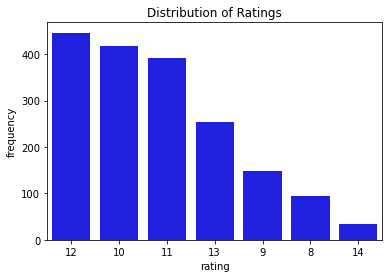

In [89]:
# Plotting Distribution of ratings
sb.countplot(x='rating_numerator',data = df_1_clean,color='blue', order = ratings.index)
plt.title('Distribution of Ratings')
plt.xlabel('rating')
plt.ylabel('frequency')
plt.savefig('Dogs_ratings_counts.png');

We can see that 12 rating is the highest frequency and 14 rating is the least frequency.

**Favourites count vs Retweets count**

In [90]:
df_1_clean[['retweet_count' , 'favorite_count']].describe()

,retweet_count,favorite_count
count,1785.000000,1785.000000
mean,2931.384314,9499.485714
std,4878.023112,12649.689374
min,16.000000,81.000000
25%,661.000000,2203.000000
50%,1474.000000,4550.000000
75%,3440.000000,12217.000000
max,79515.000000,132810.000000


### Visualization

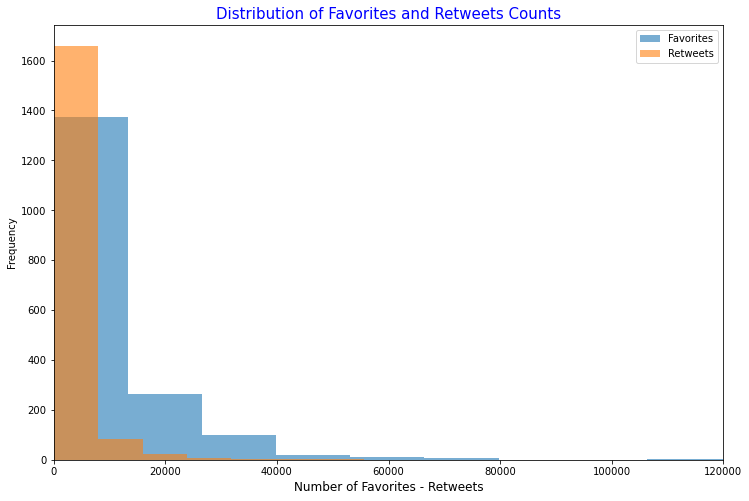

In [91]:
plt.figure(figsize=[12, 8])

plt.hist(df_1_clean.favorite_count, alpha = 0.6, label='Favorites')
plt.hist(df_1_clean.retweet_count, alpha = 0.6, label='Retweets')
plt.title('Distribution of Favorites and Retweets Counts', color='blue', fontsize=15)
plt.xlabel('Number of Favorites - Retweets', fontsize=12)
plt.ylabel('Frequency')
plt.xlim(0, 120000)
plt.legend()
plt.savefig('Favs_retweets_counts.png')
plt.show()

We can observe that the distribution of favourite count and retweets count is similar, as small number of likes/retweets  have the highest frequency and big number of likes/retweets have the least frequency. This general shows a right skewed distributions.

**Dog breed analysis**

In [92]:
# copy of df_2
df_2_copy = df_2_clean.copy()
df_2_copy = df_2_copy[['tweet_id' ,'prediction_1' ,'confidence_1', 'is_dog_1']]
df_2_copy.shape

(2075, 4)

In [93]:
# copy of df_1
df_1_copy = df_1_clean.copy()
df_1_copy = df_1_copy[['tweet_id' , 'rating_numerator' , 'retweet_count' , 'favorite_count']]
df_1_copy.shape

(1785, 4)

In [94]:
# left merge the datasets
breed = pd.merge(left=df_1_copy, right=df_2_copy, on='tweet_id')
breed.shape

(1785, 7)

In [95]:
breed.head()

,tweet_id,rating_numerator,retweet_count,favorite_count,prediction_1,confidence_1,is_dog_1
0,892420643555336193,13,8853.0,39467.0,orange,0.097049,False
1,892177421306343426,13,6514.0,33819.0,Chihuahua,0.323581,True
2,891815181378084864,12,4328.0,25461.0,Chihuahua,0.716012,True
3,891689557279858688,13,8964.0,42908.0,paper_towel,0.170278,False
4,891327558926688256,12,9774.0,41048.0,basset,0.555712,True


In [96]:
# select only dogs == true
breed = breed[breed['is_dog_1'] == True]

In [97]:
# most favs
breed_fav = breed.groupby('prediction_1').sum().reset_index()
breed_fav = breed_fav[['prediction_1', 'favorite_count']]
breed_fav = breed_fav.sort_values('favorite_count', ascending = False)[:20]
breed_fav

,prediction_1,favorite_count
185,golden_retriever,1616978.0
44,Labrador_retriever,1103989.0
58,Pembroke,976895.0
22,Chihuahua,665004.0
64,Samoyed,537355.0
31,French_bulldog,465738.0
137,chow,404241.0
285,pug,317034.0
141,cocker_spaniel,315825.0
59,Pomeranian,278818.0


### Visualization

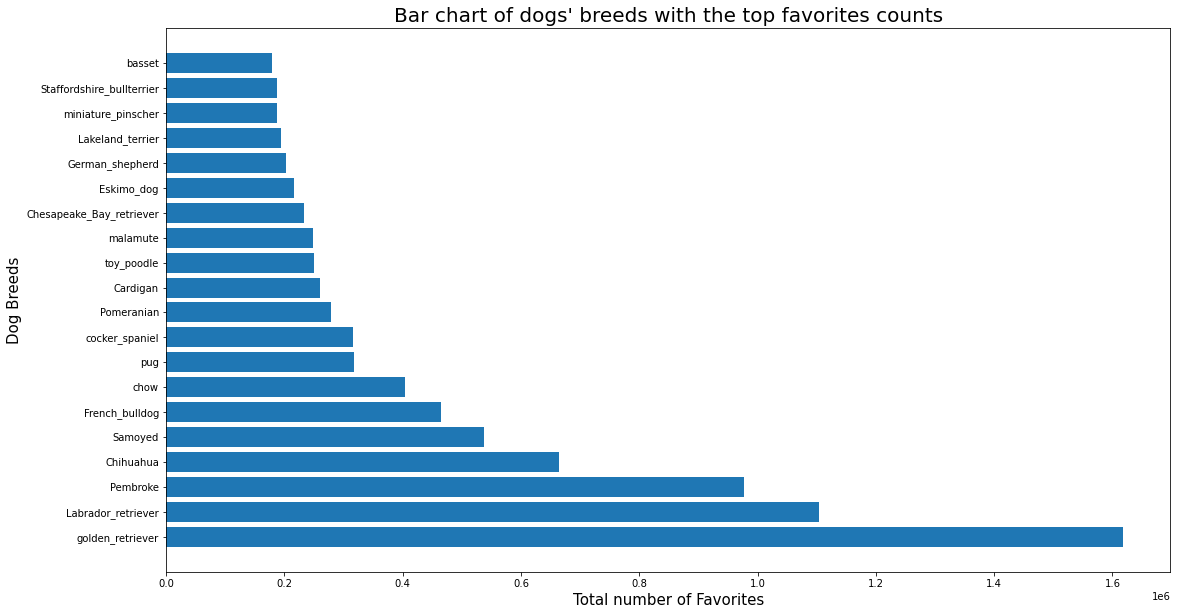

In [100]:
# countplot
plt.figure(figsize=[18, 10])

plt.barh(range(len(breed_fav.prediction_1)), breed_fav.favorite_count) 

plt.yticks(range(len(breed_fav.prediction_1)), breed_fav.prediction_1)

plt.xlabel('Total number of Favorites', fontsize = 15)
plt.ylabel('Dog Breeds', fontsize = 15)
plt.title('Bar chart of dogs\' breeds with the top favorites counts', fontsize = 20)
plt.savefig('Dog-breed-favs.png');

We can observe that the golden_retriever and Labrador_retriever breeds are most liked breeds.